# ML Technique - SVM

Sources: https://github.com/cmadusankahw/email-spam-detection-with-SVM

https://www.kaggle.com/code/elnahas/phishing-email-detection-using-svm-rfc

In [1]:
!pip install scikit-learn


In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

## Load the Dataset

In [3]:
# Load the dataset
# data_path = 'masterDataset.csv'
# master_data = pd.read_csv(data_path)

# # Display the first few rows of the dataset
# master_data.head()

Validation Accuracy: 0.9783923941227312
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       789
           1       0.99      0.95      0.97       368

    accuracy                           0.98      1157
   macro avg       0.98      0.97      0.97      1157
weighted avg       0.98      0.98      0.98      1157

Validation Confusion Matrix:
[[784   5]
 [ 20 348]]
Test Accuracy: 0.9732065687121867
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       763
           1       0.98      0.94      0.96       394

    accuracy                           0.97      1157
   macro avg       0.97      0.97      0.97      1157
weighted avg       0.97      0.97      0.97      1157

Test Confusion Matrix:
[[755   8]
 [ 23 371]]


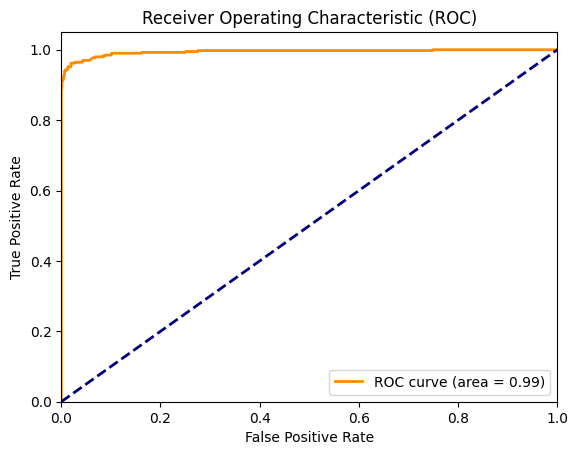

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


train = pd.read_csv('trainData.csv')
validation = pd.read_csv('validationData.csv')
test = pd.read_csv('testData.csv')

# Combine the Subject and Body columns to form the feature set
X_train = train['Body'].fillna('')
y_train = train['label']
X_val = validation['Body'].fillna('')
y_val = validation['label']
X_test = test['Body'].fillna('')
y_test = test['label']

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Train a linear SVM model using LinearSVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_tfidf, y_train)

# Validate the model
y_val_pred = svm_model.predict(X_val_tfidf)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")
report_val = classification_report(y_val, y_val_pred)
print("Validation Classification Report:")
print(report_val)
confusion_mat_val = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(confusion_mat_val)

# Predict the labels for the test set
y_test_pred = svm_model.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
report_test = classification_report(y_test, y_test_pred)
print("Test Classification Report:")
print(report_test)
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_mat_test)

# Compute ROC curve and ROC area
y_test_score = svm_model.decision_function(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test, y_test_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [5]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

# Cross-validation with TfidfVectorizer
vectorizer = TfidfVectorizer()
svm_model_tfidf = make_pipeline(vectorizer, SVC(kernel='linear'))
tfidf_scores = cross_val_score(svm_model_tfidf, X, y, cv=5)
print(f'TfidfVectorizer CV Scores: {tfidf_scores}')
print(f'Mean CV Score with TfidfVectorizer: {tfidf_scores.mean()}')

# Cross-validation with CountVectorizer
count_vectorizer = CountVectorizer()
svm_model_count = make_pipeline(count_vectorizer, SVC(kernel='linear'))
count_scores = cross_val_score(svm_model_count, X, y, cv=5)
print(f'CountVectorizer CV Scores: {count_scores}')
print(f'Mean CV Score with CountVectorizer: {count_scores.mean()}')


TfidfVectorizer CV Scores: [0.97179878 0.98245614 0.97330282 0.97787948 0.97482838]
Mean CV Score with TfidfVectorizer: 0.9760531199419544
CountVectorizer CV Scores: [0.95503049 0.95804729 0.95575896 0.95804729 0.95881007]
Mean CV Score with CountVectorizer: 0.9571388206731039


Verify that the model is not overfitting

In [6]:
# Evaluate the model on the training set
y_train_pred = svm_model.predict(X_train_tfidf)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {accuracy_train}")
report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(report_train)
confusion_mat_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:")
print(confusion_mat_train)

# Evaluate the model on the validation set
y_val_pred = svm_model.predict(X_val_tfidf)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")
report_val = classification_report(y_val, y_val_pred)
print("Validation Classification Report:")
print(report_val)
confusion_mat_val = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(confusion_mat_val)

# Evaluate the model on the test set
#y_test_pred = svm_model.predict(X_test_tfidf)
#accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
report_test = classification_report(y_test, y_test_pred)
print("Test Classification Report:")
print(report_test)
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_mat_test)

Training Accuracy: 0.9959251713280237
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3590
           1       1.00      0.99      0.99      1809

    accuracy                           1.00      5399
   macro avg       1.00      0.99      1.00      5399
weighted avg       1.00      1.00      1.00      5399

Training Confusion Matrix:
[[3587    3]
 [  19 1790]]
Validation Accuracy: 0.9783923941227312
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       789
           1       0.99      0.95      0.97       368

    accuracy                           0.98      1157
   macro avg       0.98      0.97      0.97      1157
weighted avg       0.98      0.98      0.98      1157

Validation Confusion Matrix:
[[784   5]
 [ 20 348]]
Test Accuracy: 0.9732065687121867
Test Classification Report:
              precision    recall 

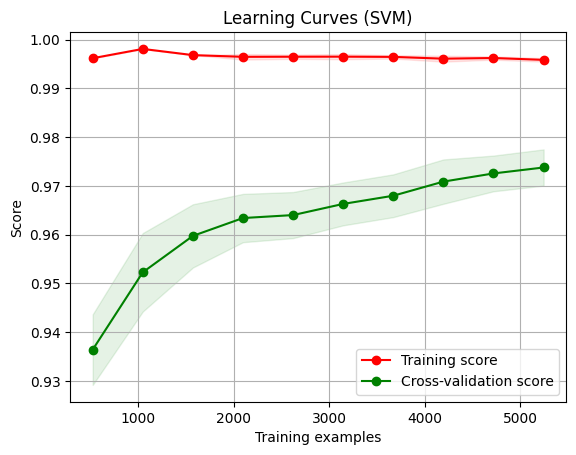

In [7]:
from sklearn.model_selection import learning_curve
# Combine training and validation sets for cross-validation
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Vectorize the text data using TfidfVectorizer
vectorizer_new = TfidfVectorizer()
X_combined_tfidf = vectorizer_new.fit_transform(X_combined)

# Define the model
svm_model_new = SVC(kernel='linear')

# Generate learning curves
train_sizes_new, train_scores_new, validation_scores_new = learning_curve(
    estimator=svm_model_new,
    X=X_combined_tfidf,
    y=y_combined,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean_new = np.mean(train_scores_new, axis=1)
train_scores_std_new = np.std(train_scores_new, axis=1)
validation_scores_mean_new = np.mean(validation_scores_new, axis=1)
validation_scores_std_new = np.std(validation_scores_new, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes_new, train_scores_mean_new, 'o-', color='r', label='Training score')
plt.plot(train_sizes_new, validation_scores_mean_new, 'o-', color='g', label='Cross-validation score')

# Fill in between the lines
plt.fill_between(train_sizes_new, train_scores_mean_new - train_scores_std_new, train_scores_mean_new + train_scores_std_new, alpha=0.1, color='r')
plt.fill_between(train_sizes_new, validation_scores_mean_new - validation_scores_std_new, validation_scores_mean_new + validation_scores_std_new, alpha=0.1, color='g')

# Labeling
plt.title('Learning Curves (SVM)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Show plot
plt.show()

Bag of words

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),  # Changed from 'tfidf' to 'bow'
    ('clf', SVC(random_state=42)),
])

# Parameters to tune
parameters_svm = {
    'bow__max_df': (0.75, 0.85),
    'bow__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Using GridSearchCV to find the best parameters on the validation set
grid_search_svm = GridSearchCV(pipeline_svm, parameters_svm, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_val, y_val)

# Print best score and parameters
print("Best score (SVM): %0.3f" % grid_search_svm.best_score_)
print("Best parameters set (SVM):")
best_parameters_svm = grid_search_svm.best_estimator_.get_params()
for param_name in sorted(parameters_svm.keys()):
    print("\t%s: %r" % (param_name, best_parameters_svm[param_name]))

# Use the best parameters to re-train the final model
pipeline_svm.set_params(**best_parameters_svm)
pipeline_svm.fit(X_train, y_train)

# Evaluate the model on the test data
predictions_svm = pipeline_svm.predict(X_test)
print("Accuracy (SVM):", accuracy_score(y_test, predictions_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, predictions_svm))
print("Classification Report (SVM):")
print(classification_report(y_test, predictions_svm))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score (SVM): 0.939
Best parameters set (SVM):
	bow__max_df: 0.75
	bow__ngram_range: (1, 1)
	clf__C: 10
	clf__kernel: 'rbf'
Accuracy (SVM): 0.9611063094209161
Confusion Matrix (SVM):
[[761   2]
 [ 43 351]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       763
           1       0.99      0.89      0.94       394

    accuracy                           0.96      1157
   macro avg       0.97      0.94      0.96      1157
weighted avg       0.96      0.96      0.96      1157



Word2vec

In [13]:
from gensim.models import Word2Vec
# Tokenize the text data
def tokenize_text(text):
    return text.split()


# Tokenize the text data
def tokenize_text(text):
    return text.split()

X_train_tokens = X_train.apply(tokenize_text)
X_val_tokens = X_val.apply(tokenize_text)
X_test_tokens = X_test.apply(tokenize_text)

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Create feature vectors by averaging word vectors for each document
def document_vector(doc):
    # Get the word vectors for words in the document that are in the Word2Vec model
    word_vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv.index_to_key]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        # Return a zero vector if the document is empty or has no known words
        return np.zeros(word2vec_model.vector_size)

X_train_w2v = X_train_tokens.apply(document_vector)
X_val_w2v = X_val_tokens.apply(document_vector)
X_test_w2v = X_test_tokens.apply(document_vector)

# Convert lists to arrays
X_train_w2v = np.array(X_train_w2v.tolist())
X_val_w2v = np.array(X_val_w2v.tolist())
X_test_w2v = np.array(X_test_w2v.tolist())

# Train a linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_w2v, y_train)

# Validate the model
y_val_pred = svm_model.predict(X_val_w2v)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = svm_model.predict(X_test_w2v)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9412273120138289
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       789
           1       0.93      0.88      0.91       368

    accuracy                           0.94      1157
   macro avg       0.94      0.93      0.93      1157
weighted avg       0.94      0.94      0.94      1157

Test Accuracy: 0.9515989628349178
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       763
           1       0.95      0.91      0.93       394

    accuracy                           0.95      1157
   macro avg       0.95      0.94      0.95      1157
weighted avg       0.95      0.95      0.95      1157

Confusion Matrix (Test):
[[744  19]
 [ 37 357]]
